## Observations and Insights 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice.
mouse_count = len(df['Mouse ID'])
mouse_count

1893

In [18]:
duplicate_rows = df[df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [19]:
study_data = df.set_index('Mouse ID')
clean_data = study_data.drop(index = 'g989')
clean_study_data = clean_data.reset_index()
clean_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [20]:
summary_stats = clean_study_data.groupby('Drug Regimen')
tumor_mean = summary_stats['Tumor Volume (mm3)'].mean()
tumor_median = summary_stats['Tumor Volume (mm3)'].median()
tumor_stdev = summary_stats['Tumor Volume (mm3)'].std()
tumor_sem = summary_stats['Tumor Volume (mm3)'].sem()

grouped_summary = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

grouped_summary.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


## Bar and Pie Charts

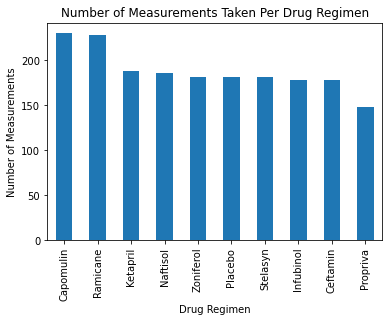

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = clean_study_data['Drug Regimen'].value_counts().plot.bar(width=0.5)

bar_plot.set_xlabel("Drug Regimen")

bar_plot.set_ylabel("Number of Measurements")

bar_plot.set_title("Number of Measurements Taken Per Drug Regimen")

bar_plot


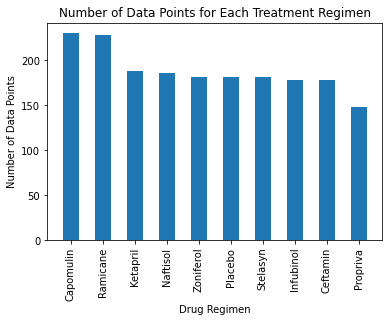

In [22]:
counts = clean_study_data['Drug Regimen'].value_counts()


x_axis = np.arange(len(counts))


plt.bar(x_axis, counts, width = 0.5)


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)


plt.xticks(rotation=90)


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')



plt.show()



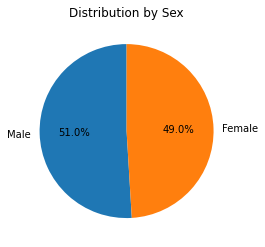

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot = clean_study_data['Sex'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

pie_plot.set_ylabel('')
pie_plot

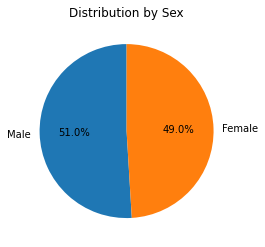

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_study_data['Sex'].value_counts()

plt.pie(sex_count, labels=sex_count.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
max_timepoint = pd.DataFrame(clean_study_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
max_timepoint

# Merge max timepoint onto data_df
merged_df = pd.merge(clean_study_data, max_timepoint, on='Mouse ID')
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [31]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_value = []

# Locate each drug from our list 'drugs' and then put in a sort of throw away dataframe
for drug in drugs:
    
    middle_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create dataframes that show rows only containing the final timepoint for each regimen
    volume_df = middle_df.loc[middle_df['Timepoint'] == middle_df['Max Timepoint']]
    
    # Create series that made up of all final volume values for each regimen
    values = volume_df['Tumor Volume (mm3)']
    drug_value.append(values)
    
    # Calculate and print the interquartile range
    quartiles = values.quantile([.25,.5,.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    interquartile = upper-lower
    print(f'Interquartile Range for {drug}: {round(interquartile, 2)}')
    
    # Find upper and lower bounds
    lower_bound = lower - (1.5*interquartile)
    upper_bound = upper + (1.5*interquartile)
    print(f'--Lower Bound for {drug}: {round(lower_bound, 2)}')
    print(f'--Upper Bound for {drug}: {round(upper_bound, 2)}')
    
    #check for outliers
    outliers_count = (values.loc[(volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'--Number of {drug} outliers: {outliers_count}')
    print('---------------------------------------------------------------------')

Interquartile Range for Capomulin: 7.78
--Lower Bound for Capomulin: 20.7
--Upper Bound for Capomulin: 51.83
--Number of Capomulin outliers: 0
---------------------------------------------------------------------
Interquartile Range for Ramicane: 9.1
--Lower Bound for Ramicane: 17.91
--Upper Bound for Ramicane: 54.31
--Number of Ramicane outliers: 0
---------------------------------------------------------------------
Interquartile Range for Infubinol: 11.48
--Lower Bound for Infubinol: 36.83
--Upper Bound for Infubinol: 82.74
--Number of Infubinol outliers: 1
---------------------------------------------------------------------
Interquartile Range for Ceftamin: 15.58
--Lower Bound for Ceftamin: 25.36
--Upper Bound for Ceftamin: 87.67
--Number of Ceftamin outliers: 0
---------------------------------------------------------------------


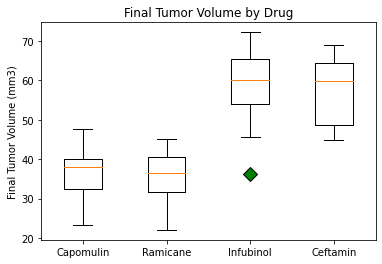

In [32]:
flierprops = dict(marker='D', markerfacecolor='g', markersize=10, markeredgecolor='black')

plt.boxplot(drug_value, flierprops=flierprops)


plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

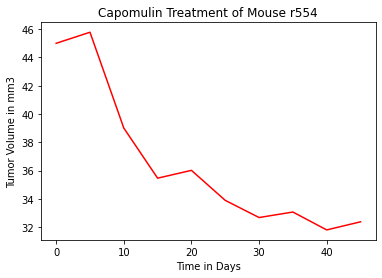

In [28]:
#I scrolled through the CSV list and chose a mouse at random who had be subjected to Capomulin. Ended up with r554
#pull data for r554 from clean_study_data and set as variable
mouse_sample = clean_study_data.loc[clean_study_data['Mouse ID'] == 'r554']

#set up the plot with x and y as well as color
plt.plot(mouse_sample['Timepoint'], mouse_sample['Tumor Volume (mm3)'], color = 'r')

#label the axes and give a title
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume in mm3")
plt.title("Capomulin Treatment of Mouse r554")


plt.show()

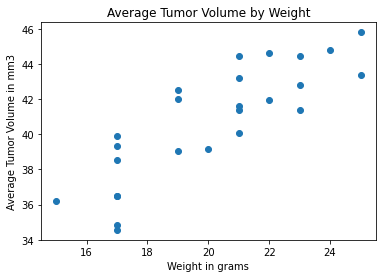

In [29]:
capomulin = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Capomulin']


avg_volume = pd.DataFrame(capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume'})

avg_volume = pd.merge(capomulin, avg_volume, on='Mouse ID')
total_avg_volume = avg_volume[['Weight (g)', 'Avg Tumor Volume']].drop_duplicates()
total_avg_volume

x = total_avg_volume['Weight (g)']
y = total_avg_volume['Avg Tumor Volume']

#plot 
plt.scatter(x, y)

# Add the labels and title to axes
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume in mm3")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


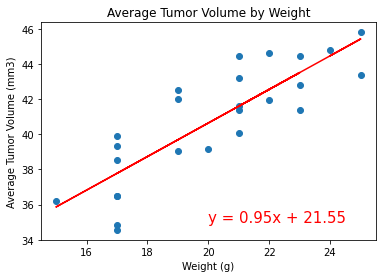

In [33]:
capomulin = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Capomulin']


avg_volume = pd.DataFrame(capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume'})

avg_volume = pd.merge(capomulin, avg_volume, on='Mouse ID')
total_avg_volume = avg_volume[['Weight (g)', 'Avg Tumor Volume']].drop_duplicates()
total_avg_volume

x = total_avg_volume['Weight (g)']
y = total_avg_volume['Avg Tumor Volume']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()